## Cargar el dataset

In [1]:
import pandas as pd
df = pd.read_csv("csv/rl2.csv")
df.head()

,x,y
0,24,3115
1,35,5717
2,36,6387
3,36,6616
4,42,9666


## Preparamiento de los datos

In [2]:
# Añadir columna x^2
df['x2'] = df['x']**2

# Separar las columnas x y x^2
X = df[['x', 'x2']]
y = df['y']

df.head()

,x,y,x2
0,24,3115,576
1,35,5717,1225
2,36,6387,1296
3,36,6616,1296
4,42,9666,1764


## Visualización de los datos

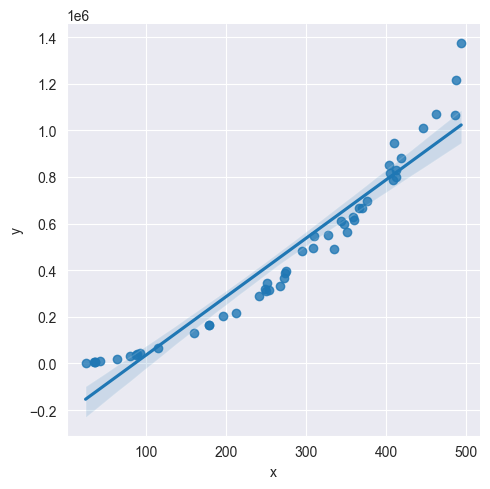

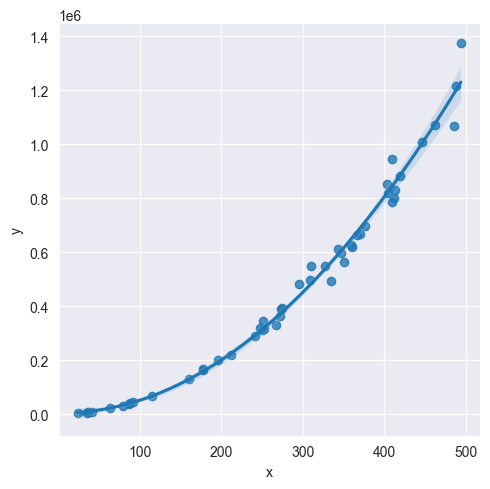

In [3]:
import seaborn as sns

sns.lmplot(data=df, x='x', y='y', order=1)
sns.lmplot(data=df, x='x', y='y', order=2)

## Preparación del conjunto de datos

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

## Creación del modelo

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

print(f"Coeficiente: {model.coef_}")
print(f"Intercepto: {model.intercept_}")

Coeficiente: [-493.59683721    6.10114676]
Intercepto: 38598.70396675449


## Evaluación

In [6]:
y_pred = model.predict(X_test)

from sklearn import metrics

print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")
print(f"var: {metrics.explained_variance_score(y_test, y_pred)}")

MSE: 1984716009.5529706
R2: 0.9840168685561363
var: 0.9842579604761277


In [7]:
print(f"La recta de regresión es: y = {model.coef_[0]}x + {model.coef_[1]}x^2 + {model.intercept_}")

La recta de regresión es: y = -493.59683721468355x + 6.1011467614829655x^2 + 38598.70396675449


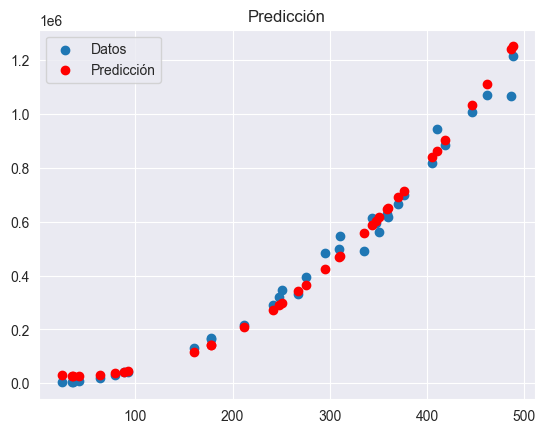

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X_test[['x']], y_test, label='Datos')
# plt.plot(X_test[['x']], y_pred, color='red', label='Predicción')
plt.scatter(X_test[['x']], y_pred, color='red', label='Predicción')
plt.title('Predicción')
plt.legend()
plt.show()